In [1]:
# learn jiu jitsu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import env
import os
import wrangle

## Assigned Priority Questions
* Which lessons are least accessed?

* At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

* Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [2]:
# load data
df = wrangle.prep_logs()

# preview data
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False


In [3]:
# get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  float64       
 10  program     847330 non-null  object        
 11  is_staff    900223 non-null  bool          
dtypes: bool(1), datetime64[ns](4), float64(2), int64(1), object(4)
memory usage: 83.3+ MB


### Priority Q
#### Which lessons are least accessed?

In [4]:
# view specific paths for users in the PHP program
df[(df['program_id'] == 1.0) & (df['path'].str.contains('.html') == False)]

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2018-01-26 10:14:47,/,11,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08 16:29:45,/,952,17.0,70.125.158.82,Olympic,2017-02-06,2017-05-25,2017-02-06 17:49:10,2017-02-06 17:49:10,1.0,Full-Stack PHP,False
2021-04-09 00:09:53,/,80,14.0,136.50.29.193,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,Full-Stack PHP,False
2021-04-09 00:10:29,content/javascript,80,14.0,136.50.29.193,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,1.0,Full-Stack PHP,False


In [5]:
# views 
cohort_views = df.groupby(['name'])['path'].agg(['count', 'nunique'])
cohort_views

,count,nunique
name,,
Andromeda,25359,366
Apex,33568,273
Apollo,5,4
Arches,8890,342
Badlands,93,44
Bash,17713,275
Bayes,26538,533
Betelgeuse,29356,334
Ceres,40730,301


In [6]:
def smallest_lesson(df, cohort):
    # filter results
    df = df[df.name == cohort]
    df = df[df.path != '/']
    df = df[df.path != 'mkdocs/search_index.json']
    df = df[df.path != 'search/search_index.json']
    df = df[df.path != 'toc']
    df = df[df.path != 'index.html']
    df = df[df.path != 'fundamentals/modern-data-scientist.jpg']
    df = df[df.path != 'fundamentals/AI-ML-DL-timeline.jpg']
    df = df[df.path != 'spark-execution-diagram.svg']
    df = df[df.path.notnull()]
    small_lesson = df.path.value_counts().idxmin()
    
    return small_lesson

In [7]:
smallest_lesson(df, 'Bayes')

'javascript-i/conditionals'

### Priority Q
#### At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

Can we find evidence of the shutoff just by plotting the data from 2019?

In [8]:
# gather data from 2019 in a frame
data_2019 = df[(df.index > '2018-12-31 23:59:59') & (df.index < '2020-01-01 00:00:00')]
data_2019

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-01-01 07:45:45,java-iii/mvc,271,26.0,73.31.215.224,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
2019-01-01 12:20:53,/,51,13.0,72.179.161.39,Kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,Full-Stack PHP,False
2019-01-01 12:56:12,java-i,274,26.0,67.11.239.2,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
2019-01-01 12:59:46,java-i/strings,274,26.0,67.11.239.2,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
2019-01-01 15:25:49,java-i/methods,274,26.0,67.11.239.2,Xanadu,2018-09-17,2019-02-08,2018-09-17 19:09:51,2018-09-17 19:09:51,2.0,Full-Stack Java,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 15:44:41,java-iii/user-input,514,28.0,67.11.193.143,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False
2019-12-31 15:44:41,java-iii/passwords,514,28.0,67.11.193.143,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,2.0,Full-Stack Java,False
2019-12-31 17:41:42,java-i,490,51.0,189.140.49.80,Deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,2.0,Full-Stack Java,False


In [9]:
# resample path data by day
daily_2019 = data_2019['path'].resample('D').count()
daily_2019

date_time
2019-01-01     43
2019-01-02     97
2019-01-03    107
2019-01-04    130
2019-01-05     35
             ... 
2019-12-27    101
2019-12-28     95
2019-12-29     40
2019-12-30    184
2019-12-31     95
Freq: D, Name: path, Length: 365, dtype: int64

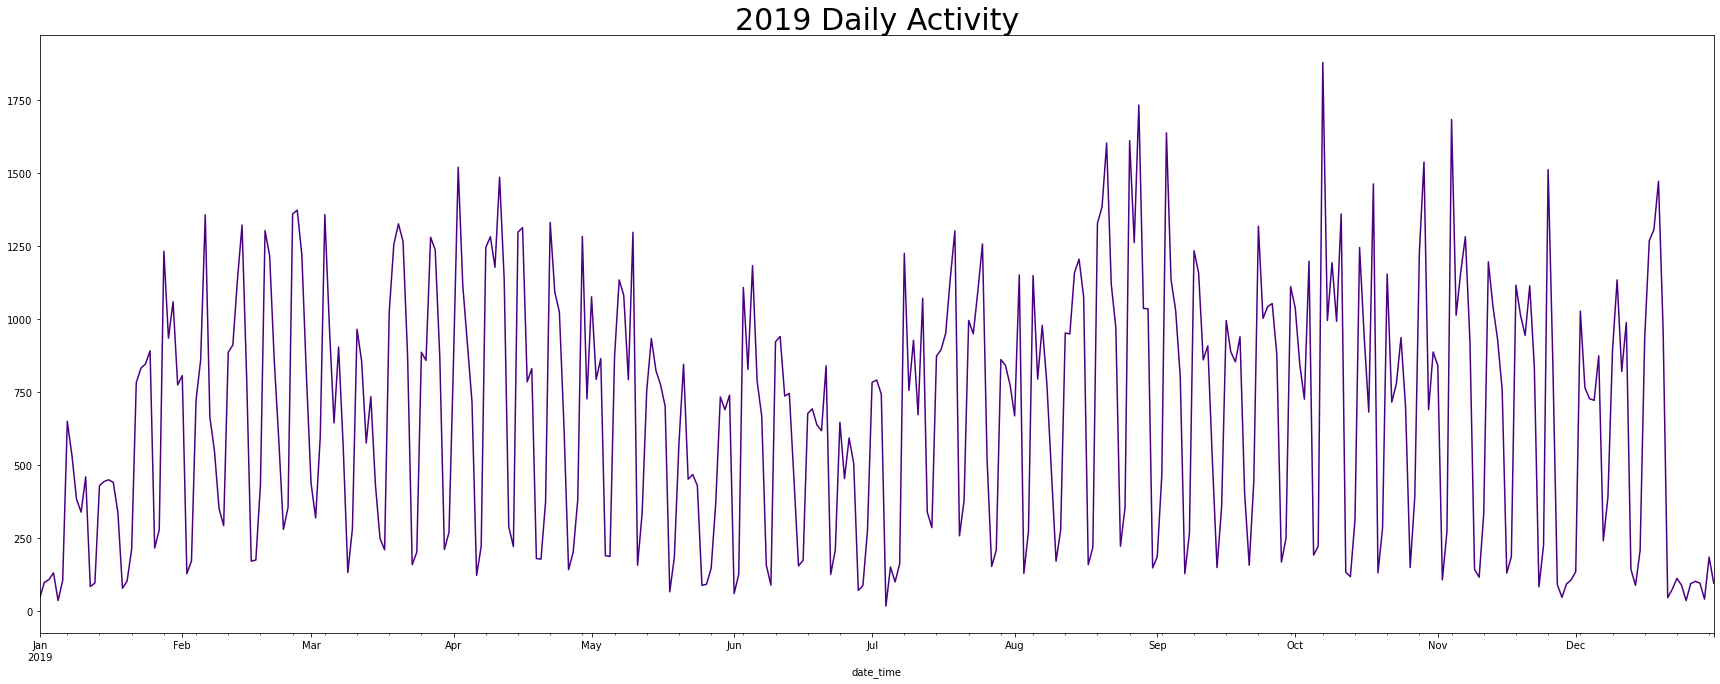

In [10]:
# create figure
plt.figure(figsize = (30, 11))

# plot number of paths taken per day
daily_2019.plot(color = 'indigo')

# title
plt.title('2019 Daily Activity', size = 30);

In [11]:
# resample path data by day
daily_activity = df['path'].resample('D').count()
daily_activity

date_time
2018-01-26     572
2018-01-27     230
2018-01-28     170
2018-01-29     830
2018-01-30     652
              ... 
2021-04-17     478
2021-04-18     659
2021-04-19    2156
2021-04-20    1930
2021-04-21    1131
Freq: D, Name: path, Length: 1182, dtype: int64

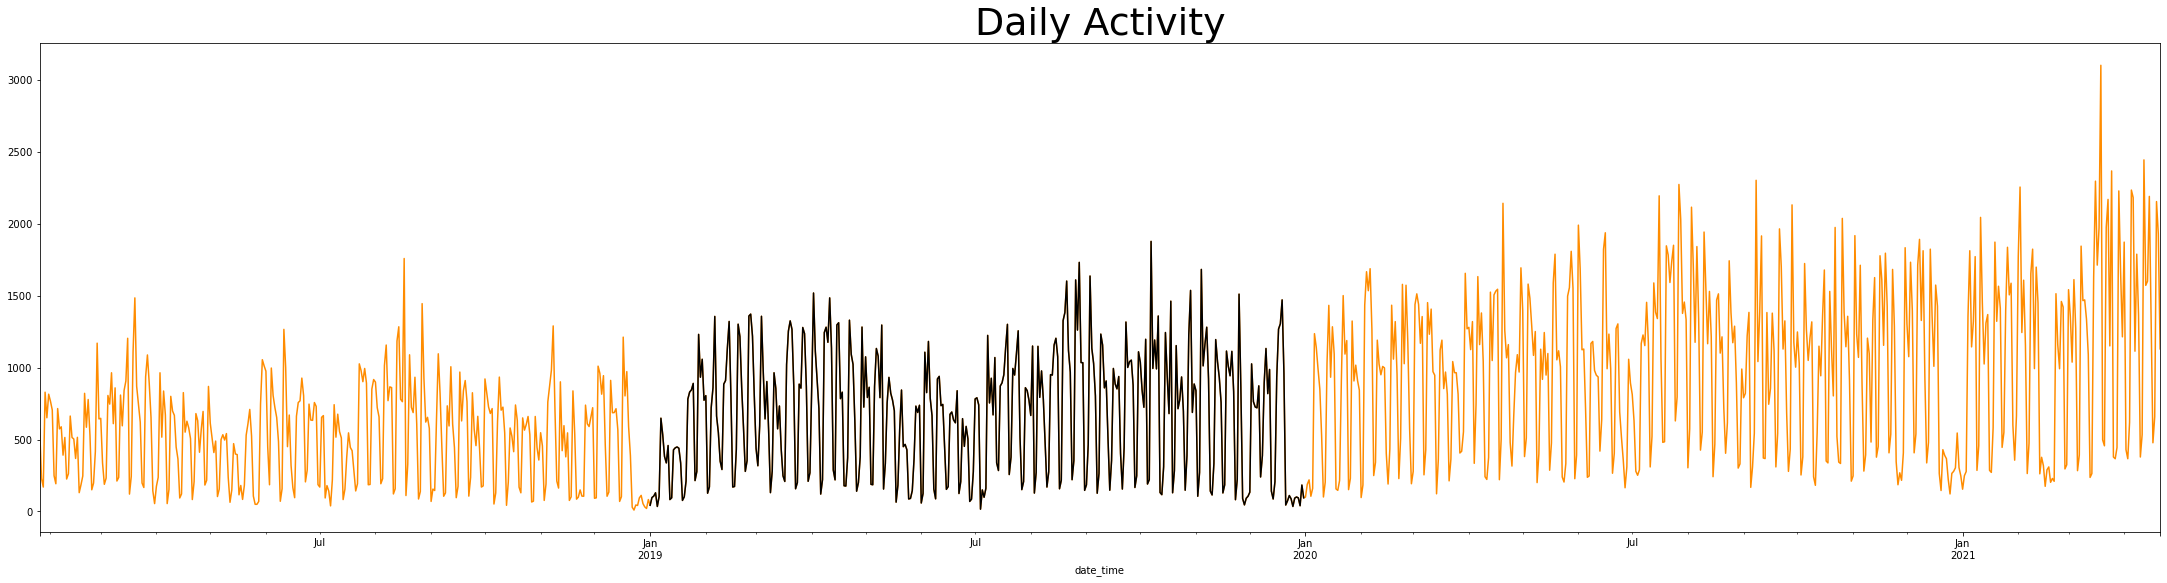

In [12]:
# create figure
plt.figure(figsize = (38, 9))

# plot number of paths taken per day
daily_activity.plot(color = 'darkorange')
daily_2019.plot(color = 'black')
plt.title('Daily Activity', size = 38);

I'm not picking up on anything. Let's resample by the hour.

In [13]:
# resample by the hour
hourly_activity = df['path'].resample('60T').count()
hourly_activity

date_time
2018-01-26 09:00:00     11
2018-01-26 10:00:00     63
2018-01-26 11:00:00    101
2018-01-26 12:00:00     28
2018-01-26 13:00:00     54
                      ... 
2021-04-21 12:00:00    102
2021-04-21 13:00:00     92
2021-04-21 14:00:00     73
2021-04-21 15:00:00     73
2021-04-21 16:00:00     72
Freq: 60T, Name: path, Length: 28352, dtype: int64

In [14]:
# resample 2019 data by hour
hourly_2019 = data_2019['path'].resample('60T').count()
hourly_2019

date_time
2019-01-01 07:00:00    1
2019-01-01 08:00:00    0
2019-01-01 09:00:00    0
2019-01-01 10:00:00    0
2019-01-01 11:00:00    0
                      ..
2019-12-31 18:00:00    0
2019-12-31 19:00:00    0
2019-12-31 20:00:00    0
2019-12-31 21:00:00    0
2019-12-31 22:00:00    1
Freq: 60T, Name: path, Length: 8752, dtype: int64

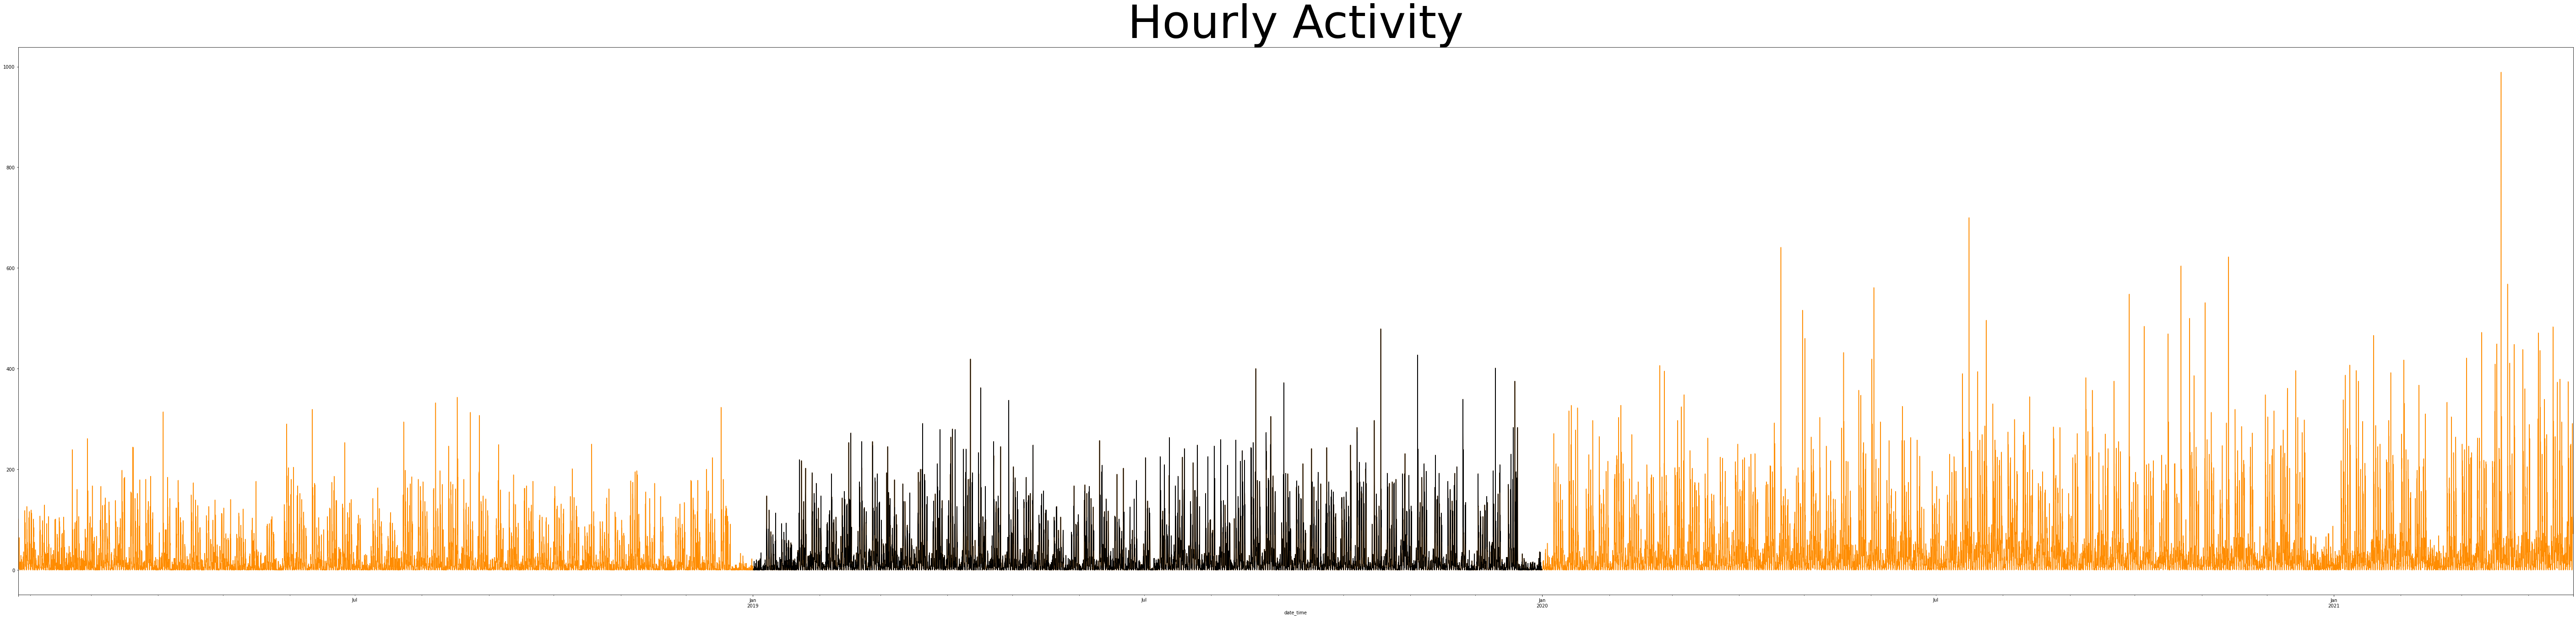

In [15]:
plt.figure(figsize = (100, 22))    # create figure

hourly_activity.plot(color = 'darkorange')    # plot hourly activity

hourly_2019.plot(color = 'black')    # plot hourly activity for 2019

plt.title('Hourly Activity', size = 100);    # title

This provides no more clarity than the first chart. I need an alternate route.

In [16]:
# assign variables to respective program data
full_stack_php = data_2019[data_2019.program_id == 1.0]
full_stack_java = data_2019[data_2019.program_id == 2.0]
data_science = data_2019[data_2019.program_id == 3.0]
front_end = data_2019[data_2019.program_id == 4.0]

In [17]:
# look at largest values and counts for paths for users in the java program
full_stack_java.path.value_counts().nlargest(30)

/                                                                            9125
toc                                                                          4867
javascript-i                                                                 4404
search/search_index.json                                                     4277
html-css                                                                     3351
java-iii                                                                     3012
spring                                                                       2950
java-ii                                                                      2912
jquery                                                                       2709
mysql                                                                        2683
java-i                                                                       2603
javascript-ii                                                                2496
html-css/element

In [18]:
# look at records where users in java program viewed regression material in the curriculum
cross_activity = full_stack_java[(full_stack_java.path.str.contains('regression') == True) & (full_stack_java.name != 'Staff')]
cross_activity

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-07-11 16:34:16,5-regression/1-overview,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-08-02 09:14:21,6-regression/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-23 11:46:24,6-regression/1-overview,410,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-09-01 00:03:01,6-regression/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-09-01 00:03:04,6-regression/2-regression-excel,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-10-02 16:31:58,6-regression/1-overview,41,21.0,97.105.19.58,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Full-Stack Java,False
2019-10-02 16:32:04,6-regression/3.3-explore,41,21.0,97.105.19.58,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Full-Stack Java,False
2019-10-02 16:32:05,6-regression/3.1-acquire-and-prep,41,21.0,97.105.19.58,Sequoia,2017-09-27,2018-02-15,2017-09-27 20:22:41,2017-09-27 20:22:41,2.0,Full-Stack Java,False
2019-10-08 11:43:03,6-regression/1-overview,458,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False


In [19]:
# view largest values and counts for the paths of data science students
data_science.path.value_counts().nlargest(30)

/                                                    1324
1-fundamentals/modern-data-scientist.jpg              495
1-fundamentals/AI-ML-DL-timeline.jpg                  493
1-fundamentals/1.1-intro-to-data-science              486
6-regression/1-overview                               399
search/search_index.json                              335
6-regression/5.0-evaluate                             289
5-stats/3-probability-distributions                   282
5-stats/4.2-compare-means                             275
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     274
10-anomaly-detection/1-overview                       273
appendix/cli-git-overview                             267
6-regression/7.0-model                                257
4-python/7.4.3-dataframes                             248
6-regression/4.0-explore                              240
6-regression/3.0-split-and-scale                      234
7-classification/project                              226
6-regression/6

In [20]:
# view records where datascience students had a path that contains 'java'
cross_active = data_science[(data_science.path.str.contains('java') == True) & (data_science.name != 'Staff')]
cross_active

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-09-23 11:45:09,java-iii,476,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:30:44,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:07,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:11,java-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:12,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:14,java-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:31:19,java-ii,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:23,javascript-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:34,java-i,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False


In [21]:
# look at records where users in java program viewed pandas material in the curriculum
activity_cross = full_stack_java[(full_stack_java.path.str.contains('pandas') == True) & (full_stack_java.name != 'Staff')]
activity_cross

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-02-14 22:58:05,4.6.3_introduction_to_pandas,223,25.0,136.50.20.17,Wrangell,2018-07-23,2018-11-29,2018-07-23 15:02:25,2018-07-23 15:02:25,2.0,Full-Stack Java,False
2019-02-18 15:57:32,4.6.3_introduction_to_pandas,187,24.0,167.24.104.150,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0,Full-Stack Java,False
2019-02-28 16:03:35,4.6.3_introduction_to_pandas,18,22.0,65.220.10.3,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-02-28 16:17:18,4.6.3_introduction_to_pandas,18,22.0,65.220.10.3,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-04-16 20:58:40,4.6.3_introduction_to_pandas,186,24.0,99.158.248.205,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0,Full-Stack Java,False
2019-09-14 12:55:19,4-python/7.4-intro-to-pandas,420,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False


In [22]:
# look at records where users in java program viewed python material in the curriculum
activity_crossing = full_stack_java[(full_stack_java.path.str.contains('python') == True) & (full_stack_java.name != 'Staff')]
activity_crossing

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-07-18 20:33:26,4-python/1-overview,450,33.0,192.171.117.210,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-07-24 12:28:13,4-python/1-overview,450,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-07-24 12:29:19,4-python/2-introduction-to-python,450,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-07-24 13:18:38,4-python/3-data-types-and-variables,450,33.0,97.105.19.58,Ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,2.0,Full-Stack Java,False
2019-08-23 11:44:06,4-python/1-overview,414,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:44:23,4-python/2-introduction-to-python,414,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:45:33,4-python/1-overview,414,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:46:27,4-python/1-overview,420,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:46:36,4-python/3-data-types-and-variables,423,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False


In [23]:
# view records where datascience students had a path that contains 'html'
ds_html = data_science[(data_science.path.str.contains('html') == True) & (data_science.name != 'Staff')]
ds_html

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-09-23 00:49:32,13-advanced-topics/3.5-html-templates,484,34.0,70.117.31.136,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-23 00:49:46,13-advanced-topics/3.6-html-forms,484,34.0,70.117.31.136,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-24 10:13:15,13-advanced-topics/3.5-html-templates,475,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-24 10:13:23,13-advanced-topics/3.6-html-forms,475,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:30:42,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:30:49,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:13,html-css,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:16,html-css/introduction,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False
2019-09-25 19:32:17,html-css/elements,476,34.0,136.50.49.145,Bayes,2019-08-19,2020-01-30,2019-08-20 14:38:55,2019-08-20 14:38:55,3.0,Data Science,False


In [24]:
# look at records where users in java program viewed statistics material in the curriculum
java_stats = full_stack_java[(full_stack_java.path.str.contains('stats') == True) & (full_stack_java.name != 'Staff')]
java_stats

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-07-11 14:01:54,2-stats/1-overview,186,24.0,24.243.59.161,Voyageurs,2018-05-29,2018-10-11,2018-05-25 22:25:57,2018-05-25 22:25:57,2.0,Full-Stack Java,False
2019-07-11 16:47:18,2-stats/2.2-navigating-excel,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 18:51:15,2-stats/1-overview,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 18:51:32,2-stats/2.1-intro-to-excel,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 19:03:14,2-stats/2.2-excel-functions,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-07-29 19:27:27,2-stats/3.1-descriptive-stats,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-08-10 13:21:56,2-stats/3.1-descriptive-stats,344,29.0,70.122.40.62,Zion,2019-01-22,2019-06-04,2019-01-20 23:18:57,2019-01-20 23:18:57,2.0,Full-Stack Java,False
2019-08-31 23:56:45,5-stats/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-31 23:57:08,5-stats/sampling,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False


In [25]:
java_funds = full_stack_java[(full_stack_java.path.str.contains('anomaly') == True) & (full_stack_java.name != 'Staff')]
java_funds

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,program,is_staff
date_time,,,,,,,,,,,,
2019-08-02 09:14:25,10-anomaly-detection/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-02 09:14:25,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-08-23 11:46:22,10-anomaly-detection/1-overview,410,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-08-23 11:46:22,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,410,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,2.0,Full-Stack Java,False
2019-12-12 16:41:43,10-anomaly-detection/1-overview,489,51.0,97.105.19.58,Deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,2.0,Full-Stack Java,False
2019-12-12 16:41:44,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,489,51.0,97.105.19.58,Deimos,2019-09-16,2020-02-27,2019-09-16 13:07:04,2019-09-16 13:07:04,2.0,Full-Stack Java,False
2019-12-22 19:45:06,10-anomaly-detection/1-overview,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False
2019-12-22 19:45:06,10-anomaly-detection/AnomalyDetectionCartoon.jpeg,18,22.0,45.20.117.182,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0,Full-Stack Java,False


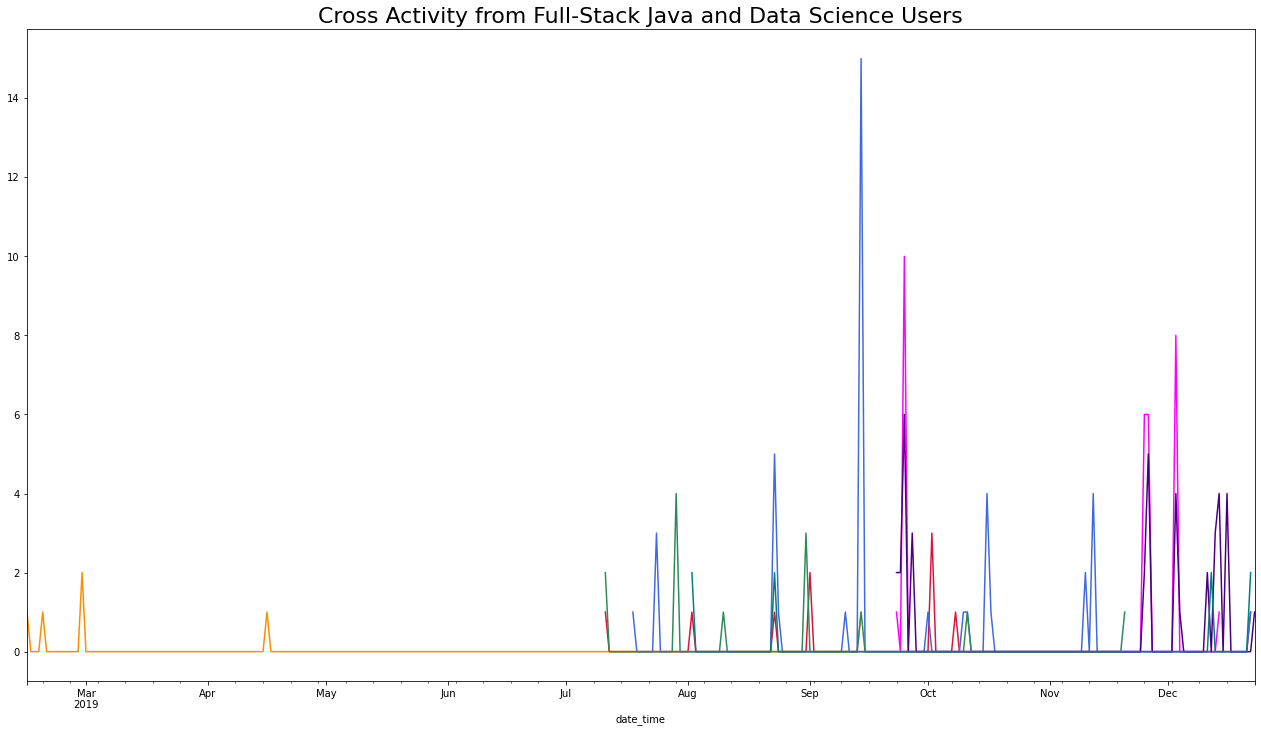

In [27]:
plt.figure(figsize = (22, 12))    # create figure for plots

plt.title('Cross Activity from Full-Stack Java and Data Science Users', size = 22)    # title

cross_day = cross_activity.path.resample('D').count()    # resample web dev users looking up regression

crosses_day = cross_active.path.resample('D').count()    # resample data science users looking up java 

day_crossing = activity_cross.path.resample('D').count()    # resample web dev users looking up pandas

day_cross = activity_crossing.path.resample('D').count()    # resample web dev users looking up python

ds_cross = ds_html.path.resample('D').count()    # resample data science users looking up html

java_cross = java_stats.path.resample('D').count()    # resample web dev users looking up stats

jawa_funds = java_funds.path.resample('D').count()    # resample web dev users looking up anomaly material

jawa_cross = 


cross_day.plot(color = 'crimson')   # plot web dev user activity in regards to regression

crosses_day.plot(color = 'magenta')    # plot data science user activity in regards to java

day_crossing.plot(color = 'darkorange')    # plot web dev users looking up pandas

day_cross.plot(color = 'royalblue')    # plot we dev users looking up python

ds_cross.plot(color = 'indigo')    # plot data science users looking up html

java_cross.plot(color = 'seagreen')    # plot web dev users researching stats

jawa_funds.plot(color = 'teal');     # plot web dev users looking up anomaly material

There appears to be a big gap in cross activity from March to mid-April, and then again from mid-April to mid-July. This is the only evidence found for a supposed shut down.

### Priority Q
#### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [ ]:
# create column that serves as a boolean mask to determine whether or not a user is active
df['active'] = df.index < df.end_date

In [ ]:
# check it
df.head()

In [ ]:
# assign variable to all data where the user is active
active_logs = df[df.active == True]
active_logs

In [ ]:
# assign variable to all logs accessed past graduation 
post_grad = df[df.active == False]
post_grad

In [ ]:
# views 
active_users = active_logs.groupby(['user_id'])['path'].agg(['count', 'nunique'])
active_users

In [ ]:
active_users['count'].hist(bins = 50);